In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [6]:
!pip install loguru


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.1 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLOWorld
from ultralytics.engine.results import Boxes

# Import từ tệp utils.py tại /content
from utils import save_detection_results



In [8]:
# Khởi tạo mô hình YOLO-World với trọng số đã được huấn luyện trước
model = YOLOWorld("yolov8s-world.pt")


100%|██████████| 25.9M/25.9M [00:00<00:00, 365MB/s]


In [9]:
# Định nghĩa các lớp tùy chỉnh
model.set_classes(["bus"])  # Chỉ định lớp 'bus' là lớp cần phát hiện


requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-6p4vt6fp
  Resolved https://github.com/ultralytics/CLIP.git to commit d19bfc14081d768afe1e4379609444c472f4b38e
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 133.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1382443 sha256=cb27eb51b11de714b3c83a7005a6e68deb06b9d81736c8bdb92391d2d98f098e
  Stored in directory: /tmp/pip-ephem-wheel-cache-0f1_ntsl/wheels/04/89/1d/c5712518ddb082b177c25dd0e1119b6a1c45ea1ab4e7fcd8a6
Successfully built clip

requirements: AutoUpdate success ✅ 5.9s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|███████████████████████████████████████| 338M/338M [00:15<00:00, 22.3MiB/s]


In [11]:
# Thực hiện dự đoán trên một hình ảnh
results: Boxes = model.predict("/content/bus.jpg")



image 1/1 /content/bus.jpg: 640x480 1 bus, 85.9ms
Speed: 16.4ms preprocess, 85.9ms inference, 128.4ms postprocess per image at shape (1, 3, 640, 480)


In [14]:
!pip install opencv-python


In [16]:
import cv2  # Đảm bảo đã import OpenCV

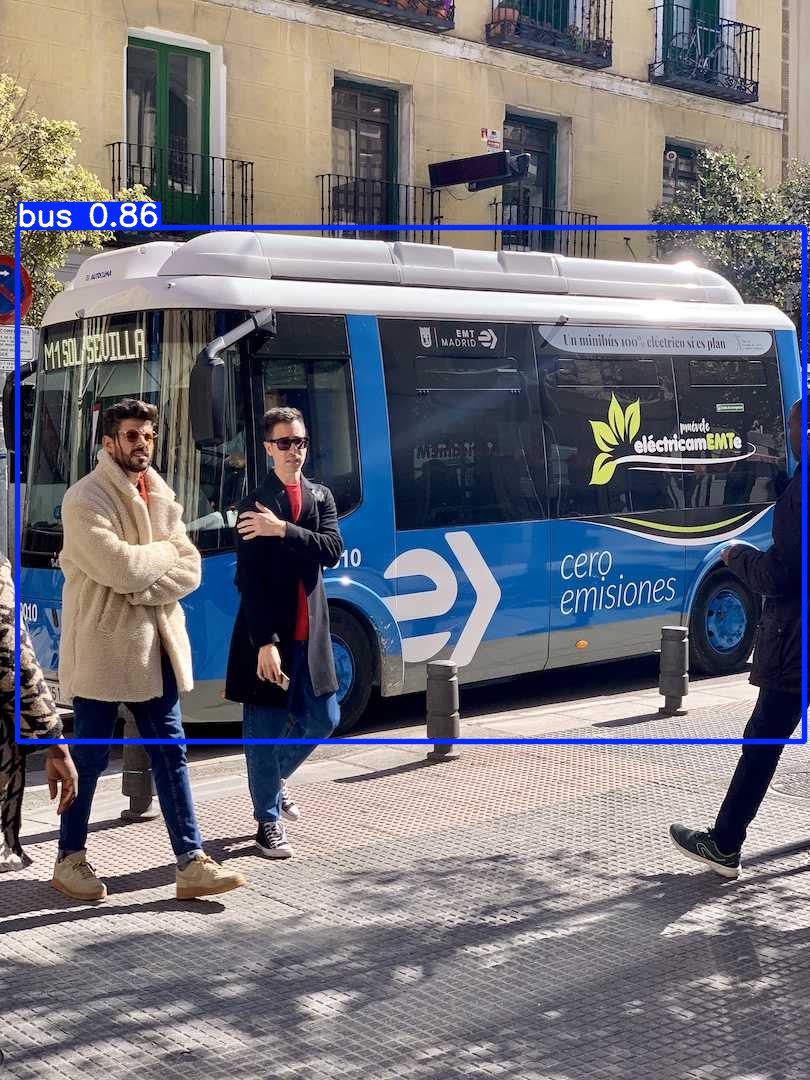

True

In [17]:
# Hiển thị kết quả dự đoán cho đối tượng đầu tiên trong danh sách kết quả
results[0].show()  # Hiển thị hình ảnh với các hộp bao quanh các đối tượng

# Lưu kết quả vào tệp
output_path = 'output_bus.jpg'
cv2.imwrite(output_path, results[0].plot())  # Lưu hình ảnh đã xử lý vào tệp

In [21]:
from ultralytics import YOLOWorld
from ultralytics.engine.results import Boxes
from utils import save_detection_results

# Khởi tạo mô hình YOLO-World với trọng số đã huấn luyện trước
model = YOLOWorld("yolov8x-world.pt")

# Định nghĩa các lớp đối tượng cần phát hiện
model.set_classes(["phone", "mask", "glasses"])  # Lớp cần phát hiện

# Thực hiện dự đoán trên hình ảnh
results: Boxes = model.predict(
    "/content/vietnam-3.jpg", max_det=100, iou=0.01, conf=0.01
)

# Lưu kết quả phát hiện dưới dạng hình ảnh
save_detection_results(results)


100%|██████████| 141M/141M [00:03<00:00, 37.8MB/s]



image 1/1 /content/vietnam-3.jpg: 384x640 1 phone, 3 masks, 2 glassess, 77.4ms
Speed: 2.1ms preprocess, 77.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Image saved to /content/run/img_203b649b-2264-433b-87a0-d3a5d7046879.jpg


['/content/run/img_203b649b-2264-433b-87a0-d3a5d7046879.jpg']

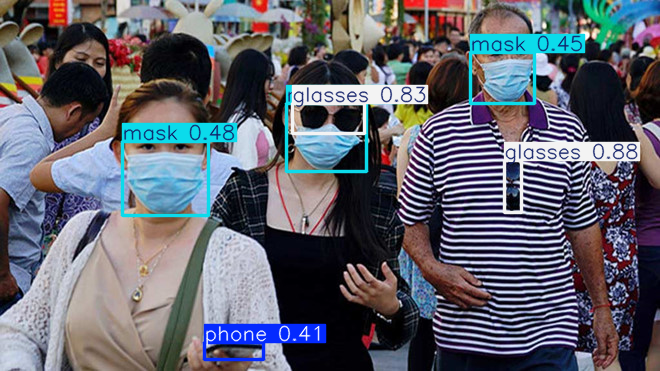

True

In [22]:
# Hiển thị kết quả dự đoán cho đối tượng đầu tiên trong danh sách kết quả
results[0].show()  # Hiển thị hình ảnh với các hộp bao quanh các đối tượng

# Lưu kết quả vào tệp
output_path = 'output_bus.jpg'
cv2.imwrite(output_path, results[0].plot())  # Lưu hình ảnh đã xử lý vào tệp